# **Installing necessary libraries**

In [3]:
#Downloading libraries

%pip install setuptools catboost optuna seaborn scikit-learn==1.4.2 openpyxl nbformat numpy ipython  lightgbm xgboost lazypredict-nightly

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip show catboost

Name: catboost
Version: 1.2.5
Summary: CatBoost Python Package
Home-page: https://catboost.ai
Author: CatBoost Developers
Author-email: 
License: Apache License, Version 2.0
Location: c:\users\asus\downloads\cat_model-main\.venv\lib\site-packages
Requires: graphviz, matplotlib, numpy, pandas, plotly, scipy, six
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip show numpy

Name: numpy
Version: 1.25.2
Summary: Fundamental package for array computing in Python
Home-page: https://www.numpy.org
Author: Travis E. Oliphant et al.
Author-email: 
License: BSD-3-Clause
Location: c:\users\asus\downloads\cat_model-main\.venv\lib\site-packages
Requires: 
Required-by: catboost, contourpy, lightgbm, matplotlib, optuna, pandas, scikit-learn, scipy, seaborn, xgboost
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install --upgrade ipython

Note: you may need to restart the kernel to use updated packages.


In [48]:
pip install ipywidgets

   ---------------------------------------- 0.0/139.4 kB ? eta -:--:--
   -------- ------------------------------- 30.7/139.4 kB 1.3 MB/s eta 0:00:01
   ---------------------------------------- 139.4/139.4 kB 1.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/214.4 kB ? eta -:--:--
   -------------------------------------- - 204.8/214.4 kB 4.1 MB/s eta 0:00:01
   ---------------------------------------- 214.4/214.4 kB 4.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   ---- ----------------------------------- 0.3/2.3 MB 5.9 MB/s eta 0:00:01
   -------------- ------------------------- 0.8/2.3 MB 8.8 MB/s eta 0:00:01
   ------------------------------------ --- 2.1/2.3 MB 15.0 MB/s eta 0:00:01
   ---------------------------------------- 2.3/2.3 MB 16.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [7]:
# Importing libraries and setting necessery settings

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
import optuna
from optuna.samplers import TPESampler
import lazypredict
from lazypredict import LazyRegressor
from catboost import CatBoostRegressor, Pool, cv
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, OneHotEncoder, MaxAbsScaler, LabelEncoder, PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.utils import shuffle
from sklearn.svm import SVR
from lightgbm import LGBMRegressor, Dataset

from xgboost import XGBRegressor


%matplotlib inline
plt.style.use("seaborn-v0_8")

# **Basic EDA**

In [8]:
# Readign the file

data = pd.read_csv("final_data.csv", index_col = 0)

In [9]:
# To view some real data

data.head()

,satisfaction,review,projects,avg_hrs_month,tenure,promoted,department,salary
0,0.38,0.53,2,157.00,3.00,0,sales,low
1,0.80,0.86,5,262.00,6.00,0,sales,medium
2,0.11,0.88,7,272.00,4.00,0,sales,medium
3,0.72,0.87,5,223.00,5.00,0,sales,low
4,0.37,0.52,2,159.00,3.00,0,sales,low


In [10]:
# To understand the statistica about the data

data.describe()

,satisfaction,review,projects,avg_hrs_month,tenure,promoted
count,21531.00,21531.00,21531.00,21531.00,21531.00,21531.00
mean,0.57,0.69,3.57,193.47,4.78,0.02
std,0.22,0.14,0.99,37.30,2.09,0.15
min,0.00,0.31,2.00,96.00,2.00,0.00
25%,0.42,0.58,3.00,179.00,3.00,0.00
50%,0.57,0.67,3.00,186.00,5.00,0.00
75%,0.74,0.78,4.00,209.00,6.00,0.00
max,1.00,1.00,7.00,310.00,12.00,1.00


In [11]:
# To know data types and null number

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21531 entries, 0 to 9539
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   satisfaction   21531 non-null  float64
 1   review         21531 non-null  float64
 2   projects       21531 non-null  int64  
 3   avg_hrs_month  21531 non-null  float64
 4   tenure         21531 non-null  float64
 5   promoted       21531 non-null  int64  
 6   department     21531 non-null  object 
 7   salary         21531 non-null  object 
dtypes: float64(4), int64(2), object(2)
memory usage: 1.5+ MB


In [12]:
df = shuffle(data, random_state = 777)
df

,satisfaction,review,projects,avg_hrs_month,tenure,promoted,department,salary
8917,0.59,0.82,3,162.00,2.00,0,IT,high
4664,0.38,0.78,2,182.08,6.00,0,sales,medium
7413,0.36,0.60,3,185.11,7.00,0,sales,low
9654,0.68,0.61,4,227.00,3.00,0,technical,medium
7366,0.61,0.59,4,247.00,2.00,0,technical,medium
...,...,...,...,...,...,...,...,...
4026,0.91,0.93,4,184.00,3.00,0,technical,low
7776,0.83,0.90,3,179.00,2.00,0,product_mng,low
7375,0.32,0.64,3,184.65,7.00,0,retail,medium
3940,0.33,0.83,3,178.84,5.00,0,retail,medium


# **Feature engeneering**

In [13]:
# Combining features

df['workload_intensity'] = (df['projects'] / df['tenure']) * df['avg_hrs_month']
df['relative_project_load'] = (df['projects'] / df['avg_hrs_month']) / df['tenure']
df['hours_per_project'] = df['avg_hrs_month'] / df['projects']
df['experience_weighted_promotion'] = (df['tenure'] * df['promoted']) / (df['tenure'] + 1)
df.head()

,satisfaction,review,projects,avg_hrs_month,tenure,promoted,department,salary,workload_intensity,relative_project_load,hours_per_project,experience_weighted_promotion
8917,0.59,0.82,3,162.00,2.00,0,IT,high,243.00,0.01,54.00,0.00
4664,0.38,0.78,2,182.08,6.00,0,sales,medium,60.69,0.00,91.04,0.00
7413,0.36,0.60,3,185.11,7.00,0,sales,low,79.33,0.00,61.70,0.00
9654,0.68,0.61,4,227.00,3.00,0,technical,medium,302.67,0.01,56.75,0.00
7366,0.61,0.59,4,247.00,2.00,0,technical,medium,494.00,0.01,61.75,0.00


In [14]:
# Polynomial features

poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(df[['projects', 'avg_hrs_month']])
poly_features_df = pd.DataFrame(poly_features, columns=[f'poly_{i}' for i in range(poly_features.shape[1])])
df = df.join(poly_features_df)
df.head()

,satisfaction,review,projects,avg_hrs_month,tenure,promoted,department,salary,workload_intensity,relative_project_load,hours_per_project,experience_weighted_promotion,poly_0,poly_1,poly_2,poly_3,poly_4
8917,0.59,0.82,3,162.00,2.00,0,IT,high,243.00,0.01,54.00,0.00,4.00,134.00,16.00,536.00,17956.00
4664,0.38,0.78,2,182.08,6.00,0,sales,medium,60.69,0.00,91.04,0.00,3.00,109.00,9.00,327.00,11881.00
7413,0.36,0.60,3,185.11,7.00,0,sales,low,79.33,0.00,61.70,0.00,4.00,161.00,16.00,644.00,25921.00
9654,0.68,0.61,4,227.00,3.00,0,technical,medium,302.67,0.01,56.75,0.00,3.00,179.61,9.00,538.83,32259.59
7366,0.61,0.59,4,247.00,2.00,0,technical,medium,494.00,0.01,61.75,0.00,3.00,181.40,9.00,544.20,32905.61


In [15]:
# Encoding salary categorial column

df_encoded = df

le = LabelEncoder()
df_encoded['salary'] = le.fit_transform(df_encoded['salary'])
df_encoded

,satisfaction,review,projects,avg_hrs_month,tenure,promoted,department,salary,workload_intensity,relative_project_load,hours_per_project,experience_weighted_promotion,poly_0,poly_1,poly_2,poly_3,poly_4
8917,0.59,0.82,3,162.00,2.00,0,IT,0,243.00,0.01,54.00,0.00,4.00,134.00,16.00,536.00,17956.00
4664,0.38,0.78,2,182.08,6.00,0,sales,2,60.69,0.00,91.04,0.00,3.00,109.00,9.00,327.00,11881.00
7413,0.36,0.60,3,185.11,7.00,0,sales,1,79.33,0.00,61.70,0.00,4.00,161.00,16.00,644.00,25921.00
9654,0.68,0.61,4,227.00,3.00,0,technical,2,302.67,0.01,56.75,0.00,3.00,179.61,9.00,538.83,32259.59
7366,0.61,0.59,4,247.00,2.00,0,technical,2,494.00,0.01,61.75,0.00,3.00,181.40,9.00,544.20,32905.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4026,0.91,0.93,4,184.00,3.00,0,technical,1,245.33,0.01,46.00,0.00,3.00,188.71,9.00,566.13,35611.30
7776,0.83,0.90,3,179.00,2.00,0,product_mng,1,268.50,0.01,59.67,0.00,3.00,195.00,9.00,585.00,38025.00
7375,0.32,0.64,3,184.65,7.00,0,retail,2,79.14,0.00,61.55,0.00,4.00,185.98,16.00,743.92,34588.21
3940,0.33,0.83,3,178.84,5.00,0,retail,2,107.31,0.00,59.61,0.00,3.00,232.00,9.00,696.00,53824.00


In [16]:
# Encoding department categorial column

ohe = OneHotEncoder(handle_unknown='ignore')
department_encoded = ohe.fit_transform(df_encoded[['department']]).toarray()
department_columns = ohe.categories_[0]
department_df = pd.DataFrame(department_encoded, columns=department_columns)
df_encoded = df_encoded.join(department_df)
df_encoded = df_encoded.drop('department', axis=1)
df_encoded

,satisfaction,review,projects,avg_hrs_month,tenure,promoted,salary,workload_intensity,relative_project_load,hours_per_project,...,hr,logistics,management,marketing,operations,product_mng,retail,sales,support,technical
8917,0.59,0.82,3,162.00,2.00,0,0,243.00,0.01,54.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
4664,0.38,0.78,2,182.08,6.00,0,2,60.69,0.00,91.04,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
7413,0.36,0.60,3,185.11,7.00,0,1,79.33,0.00,61.70,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
9654,0.68,0.61,4,227.00,3.00,0,2,302.67,0.01,56.75,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
7366,0.61,0.59,4,247.00,2.00,0,2,494.00,0.01,61.75,...,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4026,0.91,0.93,4,184.00,3.00,0,1,245.33,0.01,46.00,...,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
7776,0.83,0.90,3,179.00,2.00,0,1,268.50,0.01,59.67,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
7375,0.32,0.64,3,184.65,7.00,0,2,79.14,0.00,61.55,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
3940,0.33,0.83,3,178.84,5.00,0,2,107.31,0.00,59.61,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00


In [17]:
# Creating the target and feature lists for encoded dataset

target = "satisfaction"
df_encoded_features = [col for col in df_encoded.columns if col != target]
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21531 entries, 8917 to 3160
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   satisfaction                   21531 non-null  float64
 1   review                         21531 non-null  float64
 2   projects                       21531 non-null  int64  
 3   avg_hrs_month                  21531 non-null  float64
 4   tenure                         21531 non-null  float64
 5   promoted                       21531 non-null  int64  
 6   salary                         21531 non-null  int32  
 7   workload_intensity             21531 non-null  float64
 8   relative_project_load          21531 non-null  float64
 9   hours_per_project              21531 non-null  float64
 10  experience_weighted_promotion  21531 non-null  float64
 11  poly_0                         21531 non-null  float64
 12  poly_1                         21531 non-null  fl

In [18]:
# Building 40+ regressors

X_train, X_test, y_train, y_test = train_test_split(df_encoded[df_encoded_features], df_encoded[target],
                                                        test_size = 0.25,
                                                        random_state = 777)

reg = LazyRegressor(ignore_warnings = False)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

100%|██████████| 42/42 [02:21<00:00,  3.36s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001326 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2139
[LightGBM] [Info] Number of data points in the train set: 16148, number of used features: 31
[LightGBM] [Info] Start training from score 0.575357


In [19]:
# Searching for the best regressors

predictions["RMSE"].map(lambda x: '%.4f' % x)

Model
HistGradientBoostingRegressor     0.1693
LGBMRegressor                     0.1699
GradientBoostingRegressor         0.1727
RandomForestRegressor             0.1737
ExtraTreesRegressor               0.1762
XGBRegressor                      0.1773
BaggingRegressor                  0.1806
AdaBoostRegressor                 0.1831
NuSVR                             0.1859
SVR                               0.1861
MLPRegressor                      0.1898
KNeighborsRegressor               0.1976
LarsCV                            0.2003
LassoCV                           0.2004
LassoLarsCV                       0.2004
ElasticNetCV                      0.2004
LassoLarsIC                       0.2004
SGDRegressor                      0.2005
BayesianRidge                     0.2005
RidgeCV                           0.2005
Ridge                             0.2005
Lars                              0.2005
TransformedTargetRegressor        0.2005
LinearRegression                  0.2005
Orthogonal

In [20]:
# Building CatBoostRegressor for comparison

model = CatBoostRegressor()

model.fit(X_train, y_train, eval_set = [(X_test, y_test)],
            verbose = False)
preds = model.predict(X_test)
rmse = root_mean_squared_error(y_test, preds)
rmse

0.1692248636040037

# **KNN**

In [21]:
# KNN hyperparameters search using optuna


def objective(trial):
    # split data in training and test data
    X_train, X_test, y_train, y_test = train_test_split(df_encoded[df_encoded_features], df_encoded[target],
                                                        test_size=0.25,
                                                        random_state=777)

    # Instantiate scaler
    scalers = trial.suggest_categorical("scalers", ['minmax', 'standard', 'robust', 'maxabs', None])

    if scalers == "minmax":
        scaler = MinMaxScaler()
    elif scalers == "standard":
        scaler = StandardScaler()
    elif scalers == 'maxabs':
        scaler = MaxAbsScaler()
    elif scalers == 'robust':
        scaler = RobustScaler()
    else:
        scaler = None

    # Suggest hyperparameters
    param = { 
        'n_neighbors': trial.suggest_int("n_neighbors", 1, 500),
        'weights': trial.suggest_categorical("weights", ['uniform', 'distance']),
        'metric': trial.suggest_categorical("metric", ['euclidean', 'manhattan', 'minkowski',
                                                        'cityblock', 'l1', 'l2']),
        'algorithm': trial.suggest_categorical("algorithm", ['ball_tree', 'kd_tree', 'brute']),
    }
    
    if param["algorithm"] != "brute":
        param["leaf_size"] = trial.suggest_int('leaf_size', 1, 150)

    knn = KNeighborsRegressor(**param)
    
    # Make a pipeline
    pipeline = make_pipeline(scaler, knn)
    pipeline.fit(X_train, y_train)


    # Predict and estimate results
    preds = pipeline.predict(X_test)
    rmse = root_mean_squared_error(y_test, preds)

    return rmse


# Opruna study creation for tuning
sampler_knn = TPESampler(multivariate = True, group = True, seed = 777)
study_knn = optuna.create_study(study_name = "knn", sampler = sampler_knn)
study_knn.optimize(objective, n_trials = 100)
trial_knn = study_knn.best_trial
params_knn = study_knn.best_trial.params

# Printing the parameters
print("Number of finished trials: ", len(study_knn.trials))
print("Best trial:", trial_knn.number)
print("  Value: ", trial_knn.value)
print("  Params: ")

for key, value in trial_knn.params.items():
    print("    {}: {}".format(key, value))

[I 2024-06-21 23:15:25,776] A new study created in memory with name: knn
[I 2024-06-21 23:15:27,001] Trial 0 finished with value: 0.21056822883800425 and parameters: {'scalers': None, 'n_neighbors': 464, 'weights': 'distance', 'metric': 'manhattan', 'algorithm': 'ball_tree', 'leaf_size': 83}. Best is trial 0 with value: 0.21056822883800425.
[I 2024-06-21 23:15:27,557] Trial 1 finished with value: 0.20820222955354933 and parameters: {'scalers': None, 'n_neighbors': 97, 'weights': 'distance', 'metric': 'cityblock', 'algorithm': 'kd_tree', 'leaf_size': 2}. Best is trial 1 with value: 0.20820222955354933.
[I 2024-06-21 23:15:31,302] Trial 2 finished with value: 0.2029304349801855 and parameters: {'scalers': 'standard', 'n_neighbors': 307, 'weights': 'uniform', 'metric': 'l2', 'algorithm': 'kd_tree', 'leaf_size': 52}. Best is trial 2 with value: 0.2029304349801855.
[I 2024-06-21 23:15:33,901] Trial 3 finished with value: 0.2002429794772994 and parameters: {'scalers': 'maxabs', 'n_neighbors'

Number of finished trials:  100
Best trial: 80
  Value:  0.18042599113434832
  Params: 
    scalers: robust
    n_neighbors: 41
    weights: distance
    metric: manhattan
    algorithm: kd_tree
    leaf_size: 72


In [22]:
# History of optimization

optuna.visualization.plot_optimization_history(study_knn)

In [23]:
# Hyperparameters to score dependency

optuna.visualization.plot_slice(study_knn)

In [24]:
# Hyperparameter importances

optuna.visualization.plot_param_importances(study_knn)

In [25]:
# Creating scaler
if params_knn['scalers'] == "minmax":
    scaler_knn = MinMaxScaler()
elif params_knn['scalers'] == "standard":
    scaler_knn = StandardScaler()
elif params_knn['scalers'] == 'maxabs':
    scaler_knn = MaxAbsScaler()
elif params_knn['scalers'] == 'robust':
    scaler_knn = RobustScaler()
else:
    scaler_knn = None

del params_knn['scalers']

# Define optimal hyperparameters
knn = KNeighborsRegressor(**params_knn)

# Create pipeline
pipeline_knn = make_pipeline(scaler_knn, knn)

In [26]:
# Implementing cross validation

scores_knn = cross_val_score(pipeline_knn, df_encoded[df_encoded_features], df_encoded[target],  scoring = 'neg_root_mean_squared_error') * (-1)
score_mean_knn = scores_knn.mean()
print(scores_knn, "Средняя оценка:", score_mean_knn)

[0.18042442 0.17879792 0.18093424 0.17722704 0.18163885] Средняя оценка: 0.17980449579367921


# **SVR**

In [27]:
# svr hyperparameters search using optuna


def objective(trial):
    # split data in training and test data
    X_train, X_test, y_train, y_test = train_test_split(df_encoded[df_encoded_features], df_encoded[target],
                                                        test_size=0.25,
                                                        random_state=777)

    # Instantiate scaler
    scalers = trial.suggest_categorical("scalers", ['minmax', 'standard', 'robust', 'maxabs'])

    if scalers == "minmax":
        scaler = MinMaxScaler()
    elif scalers == "standard":
        scaler = StandardScaler()
    elif scalers == 'maxabs':
        scaler = MaxAbsScaler()
    elif scalers == 'robust':
        scaler = RobustScaler()
    else:
        scaler = None

    # Suggest hyperparameters
    param = { 
        'gamma': trial.suggest_categorical("gamma", ['scale', 'auto']),
        'C': trial.suggest_float('C', 0, 200),
        'epsilon': trial.suggest_float('epsilon', 0, 1),
        'tol': trial.suggest_float('tol', 0, 0.2),
    }

    svr = SVR(**param)
    
    # Make a pipeline
    pipeline = make_pipeline(scaler, svr)
    pipeline.fit(X_train, y_train)


    # Predict and estimate results
    preds = pipeline.predict(X_test)
    rmse = root_mean_squared_error(y_test, preds)

    return rmse


# Opruna study creation for tuning
sampler_svr = TPESampler(multivariate = True, group = True, seed = 777)
study_svr = optuna.create_study(study_name = "svr", sampler = sampler_svr)
study_svr.optimize(objective, n_trials = 150)
trial_svr = study_svr.best_trial
params_svr = study_svr.best_trial.params

# Printing the parameters
print("Number of finished trials: ", len(study_svr.trials))
print("Best trial:", trial_svr.number)
print("  Value: ", trial_svr.value)
print("  Params: ")

for key, value in trial_svr.params.items():
    print("    {}: {}".format(key, value))

[I 2024-06-21 23:18:12,902] A new study created in memory with name: svr
[I 2024-06-21 23:18:12,928] Trial 0 finished with value: 0.22457965602420876 and parameters: {'scalers': 'maxabs', 'gamma': 'auto', 'C': 145.39779686381402, 'epsilon': 0.7684962219206448, 'tol': 0.05384101329443865}. Best is trial 0 with value: 0.22457965602420876.
[I 2024-06-21 23:18:12,952] Trial 1 finished with value: 0.22457965602420876 and parameters: {'scalers': 'minmax', 'gamma': 'auto', 'C': 125.2946412459518, 'epsilon': 0.6817792797809532, 'tol': 0.11045136274743197}. Best is trial 0 with value: 0.22457965602420876.
[I 2024-06-21 23:18:12,979] Trial 2 finished with value: 0.22457965602420876 and parameters: {'scalers': 'standard', 'gamma': 'scale', 'C': 122.18218627102453, 'epsilon': 0.882808447266879, 'tol': 0.12446776486411636}. Best is trial 0 with value: 0.22457965602420876.
[I 2024-06-21 23:18:13,010] Trial 3 finished with value: 0.22457965602420876 and parameters: {'scalers': 'robust', 'gamma': 'aut

Number of finished trials:  150
Best trial: 95
  Value:  0.1876704158055404
  Params: 
    scalers: minmax
    gamma: auto
    C: 188.77752981239527
    epsilon: 0.1843332794591518
    tol: 0.054851588678701324


In [28]:
# History of optimization

optuna.visualization.plot_optimization_history(study_svr)

In [29]:
# Hyperparameters to score dependency

optuna.visualization.plot_slice(study_svr)

In [30]:
# Hyperparameter importances

optuna.visualization.plot_param_importances(study_svr)

In [31]:
# Creating scaler
if params_svr['scalers'] == "minmax":
    scaler_svr = MinMaxScaler()
elif params_svr['scalers'] == "standard":
    scaler_svr = StandardScaler()
elif params_svr['scalers'] == 'maxabs':
    scaler_svr = MaxAbsScaler()
elif params_svr['scalers'] == 'robust':
    scaler_svr = RobustScaler()
else:
    scaler_svr = None

del params_svr['scalers']

# Define optimal hyperparameters
svr = SVR(**params_svr)

# Create pipeline
pipeline_svr = make_pipeline(scaler_svr, svr)

In [32]:
# Implementing cross validation

scores_svr = cross_val_score(pipeline_svr, df_encoded[df_encoded_features], df_encoded[target],  scoring = 'neg_root_mean_squared_error') * (-1)
score_mean_svr = scores_svr.mean()
print(scores_svr, "Средняя оценка:", score_mean_svr)

[0.18699143 0.18713394 0.18645979 0.18608037 0.19097954] Средняя оценка: 0.18752901120752638


# **RandomForest**

In [33]:
# RandomForest hyperparameters search using optuna

def objective(trial):
    # split data in training and test data
    X_train, X_test, y_train, y_test = train_test_split(df_encoded[df_encoded_features], df_encoded[target],
                                                        test_size=0.25,
                                                        random_state=777)

    # Instantiate scaler
    scalers = trial.suggest_categorical("scalers", ['minmax', 'standard', 'robust', 'maxabs', None])

    if scalers == "minmax":
        scaler = MinMaxScaler()
    elif scalers == "standard":
        scaler = StandardScaler()
    elif scalers == 'maxabs':
        scaler = MaxAbsScaler()
    elif scalers == 'robust':
        scaler = RobustScaler()
    else:
        scaler = None
    

    # Suggest hyperparameters
    param = { 
        "n_estimators": trial.suggest_int('n_estimators', 10, 2000),
        "max_depth": trial.suggest_int('max_depth', 5, 150),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2', None])
   } 
     
    rfr = RandomForestRegressor(
        random_state = 777,
        criterion = 'friedman_mse',
        **param)

    # Make a pipeline
    pipeline = make_pipeline(scaler, rfr)
    pipeline.fit(X_train, y_train)


    # Predict and estimate results
    preds = pipeline.predict(X_test)
    rmse = root_mean_squared_error(y_test, preds)

    return rmse

# Opruna study creation for tuning
sampler_rfr = TPESampler(multivariate = True, group = True, seed = 777)
study_rfr = optuna.create_study(study_name = "RFR", sampler = sampler_rfr)
study_rfr.optimize(objective, n_trials = 150)
trial_rfr = study_rfr.best_trial
params_rfr = study_rfr.best_trial.params

# Printing the parameters
print("Number of finished trials: ", len(study_rfr.trials))
print("Best trial:", trial_rfr.number)
print("  Value: ", trial_rfr.value)
print("  Params: ")

for key, value in trial_rfr.params.items():
    print("    {}: {}".format(key, value))

[I 2024-06-22 00:47:23,220] A new study created in memory with name: RFR
[I 2024-06-22 00:48:23,552] Trial 0 finished with value: 0.1716243716761019 and parameters: {'scalers': None, 'n_estimators': 1855, 'max_depth': 111, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.1716243716761019.
[I 2024-06-22 00:49:04,321] Trial 1 finished with value: 0.17160981209239434 and parameters: {'scalers': None, 'n_estimators': 1257, 'max_depth': 104, 'max_features': 'sqrt'}. Best is trial 1 with value: 0.17160981209239434.
[I 2024-06-22 00:53:29,823] Trial 2 finished with value: 0.17331011467173554 and parameters: {'scalers': None, 'n_estimators': 1767, 'max_depth': 95, 'max_features': None}. Best is trial 1 with value: 0.17160981209239434.
[I 2024-06-22 00:53:31,016] Trial 3 finished with value: 0.17400186727100467 and parameters: {'scalers': 'maxabs', 'n_estimators': 36, 'max_depth': 81, 'max_features': 'sqrt'}. Best is trial 1 with value: 0.17160981209239434.
[I 2024-06-22 00:54:30,042] Tri

Number of finished trials:  150
Best trial: 92
  Value:  0.16917328654705474
  Params: 
    scalers: minmax
    n_estimators: 1503
    max_depth: 9
    max_features: None


In [34]:
# History of optimization

optuna.visualization.plot_optimization_history(study_rfr)

In [35]:
# Hyperparameters to score dependency

optuna.visualization.plot_slice(study_rfr)

In [36]:
# Hyperparameter importances

optuna.visualization.plot_param_importances(study_rfr)

In [37]:
# Creating scaler
if params_rfr['scalers'] == "minmax":
    scaler_rfr = MinMaxScaler()
elif params_rfr['scalers'] == "standard":
    scaler_rfr = StandardScaler()
elif params_rfr['scalers'] == 'maxabs':
    scaler_rfr = MaxAbsScaler()
elif params_rfr['scalers'] == 'robust':
    scaler_rfr = RobustScaler()
else:
    scaler_rfr = None

del params_rfr['scalers']

# Define optimal hyperparameters
rfr = RandomForestRegressor(**params_rfr, criterion = 'friedman_mse')

# Create pipeline
pipeline_rfr = make_pipeline(scaler_rfr, rfr)

In [38]:
# Implementing cross validation

scores_rfr = cross_val_score(pipeline_rfr, df_encoded[df_encoded_features], df_encoded[target],  scoring = 'neg_root_mean_squared_error') * (-1)
score_mean_rfr = scores_rfr.mean()
print(scores_rfr, "Средняя оценка:", score_mean_rfr)

[0.16822452 0.16365807 0.16763576 0.16779414 0.16965317] Средняя оценка: 0.16739313345232903


Text(0.5, 1.0, 'Feature Importance')

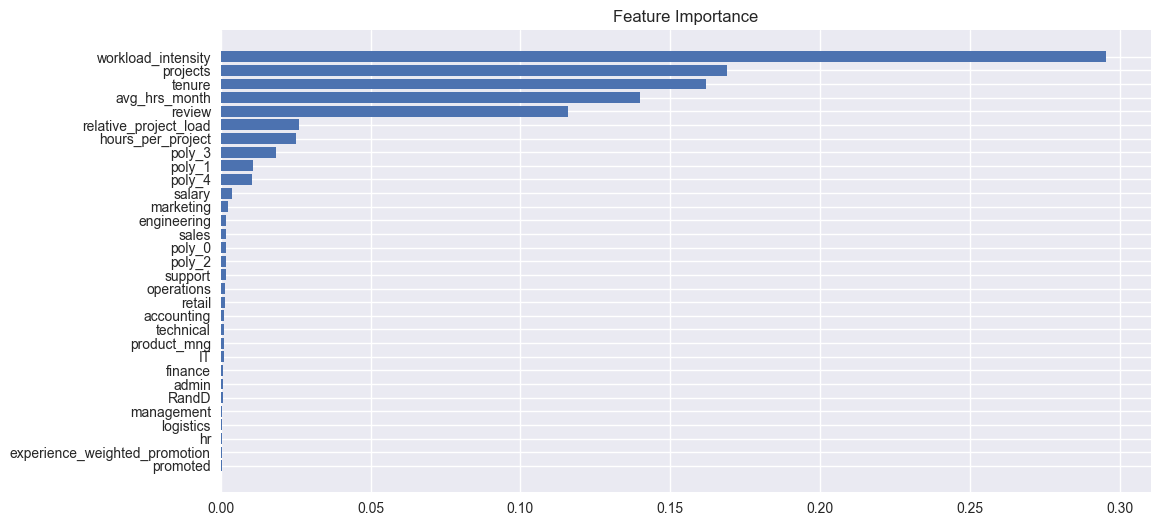

In [39]:
pipeline_rfr.fit(df_encoded[df_encoded_features], df_encoded[target])

feature_importance_rfr = pipeline_rfr.steps[1][1].feature_importances_
sorted_idx = np.argsort(feature_importance_rfr)

fig = plt.figure(figsize=(12, 6))
plt.barh(np.array(df_encoded_features)[sorted_idx], feature_importance_rfr[sorted_idx])
plt.title('Feature Importance')

# **GBM - CatBoost**

In [40]:
# Find best hyperparameters for Catboost using Optuna library

def objective(trial, data = df_encoded[df_encoded_features], target = df_encoded[target]):

    # Instantiate scaler
    scalers = trial.suggest_categorical("scalers", ['minmax', 'standard', 'robust', 'maxabs', None])

    if scalers == "minmax":
        scaler = MinMaxScaler()
    elif scalers == "standard":
        scaler = StandardScaler()
    elif scalers == 'maxabs':
        scaler = MaxAbsScaler()
    elif scalers == 'robust':
        scaler = RobustScaler()
    else:
        scaler = None

    # Transform data
    if scaler != None:
        data = scaler.fit_transform(data, target)
    
    # split data in training and test data
    train_x, test_x, train_y, test_y = train_test_split(data, target,
                                                        test_size=0.25,
                                                        random_state=777)
    # Suggest hyperparameters
    param = {
        "n_estimators": trial.suggest_int('n_estimators', 50, 1000),
        "learning_rate": trial.suggest_float('learning_rate', 0, 1),
        "depth": trial.suggest_int('depth', 4, 16),
        "l2_leaf_reg": trial.suggest_float('l2_leaf_reg', 0, 20),
        "random_strength": trial.suggest_float('random_strength', 0, 10),
        "bootstrap_type": trial.suggest_categorical(
            "bootstrap_type", ["Bayesian", "Bernoulli", "MVS"]
        ),
        'grow_policy': trial.suggest_categorical('grow_policy',
            ["Depthwise", "SymmetricTree", 'Lossguide'])
    }

    if param["bootstrap_type"] == "Bayesian":
      param["bagging_temperature"] = trial.suggest_float(
            "bagging_temperature", 0, 10)
    else:
      param["subsample"] = trial.suggest_float("subsample", 0.1, 1)

    if param["grow_policy"] == "Depthwise":
      param["min_data_in_leaf"] = trial.suggest_int('min_data_in_leaf', 1, 100)
    elif param["grow_policy"] == 'Lossguide':
       param["max_leaves"] = trial.suggest_int('max_leaves', 1, 200)
    
    # Create and fit model
    model = CatBoostRegressor(
        loss_function = 'RMSE',
        eval_metric = "RMSE",
        random_state = 777,
        use_best_model = True,
        od_type = "Iter",
        od_wait = 25,
        **param
    )

    model.fit(train_x, train_y, eval_set = [(test_x, test_y)],
              verbose = False)
    
    # Predict and estimate results
    preds = model.predict(test_x)
    rmse = root_mean_squared_error(test_y, preds)

    return rmse



# Opruna study creation for tuning
sampler_cat = TPESampler(multivariate = True, group = True, seed = 777)
study_cat = optuna.create_study(study_name = "Catboost", sampler = sampler_cat)
study_cat.optimize(objective, n_trials = 200)
trial_cat = study_cat.best_trial
params_cat = study_cat.best_trial.params

# Printing the parameters
print("Number of finished trials: ", len(study_cat.trials))
print("Best trial:", trial_cat.number)
print("  Value: ", trial_cat.value)
print("  Params: ")

for key, value in trial_cat.params.items():
    print("    {}: {}".format(key, value))

[I 2024-06-22 05:54:00,431] A new study created in memory with name: Catboost
[I 2024-06-22 05:54:05,719] Trial 0 finished with value: 0.17557441949892144 and parameters: {'scalers': None, 'n_estimators': 931, 'learning_rate': 0.7269889843190701, 'depth': 13, 'l2_leaf_reg': 5.384101329443864, 'random_strength': 6.440292920709894, 'bootstrap_type': 'MVS', 'grow_policy': 'SymmetricTree', 'subsample': 0.7136013518028579}. Best is trial 0 with value: 0.17557441949892144.
[I 2024-06-22 05:54:07,249] Trial 1 finished with value: 0.1706680622801795 and parameters: {'scalers': 'minmax', 'n_estimators': 421, 'learning_rate': 0.19316240563682419, 'depth': 11, 'l2_leaf_reg': 17.65616894533758, 'random_strength': 6.223388243205817, 'bootstrap_type': 'MVS', 'grow_policy': 'Lossguide', 'subsample': 0.6403374420965867, 'max_leaves': 107}. Best is trial 1 with value: 0.1706680622801795.
[I 2024-06-22 05:54:13,301] Trial 2 finished with value: 0.17300641946876008 and parameters: {'scalers': 'robust', '

Number of finished trials:  200
Best trial: 141
  Value:  0.16884108603176046
  Params: 
    scalers: minmax
    n_estimators: 867
    learning_rate: 0.09586669888460211
    depth: 8
    l2_leaf_reg: 19.2847378524208
    random_strength: 0.6629061458090808
    bootstrap_type: MVS
    grow_policy: SymmetricTree
    subsample: 0.8611509631033619


In [41]:
# History of optimization

optuna.visualization.plot_optimization_history(study_cat)

In [42]:
# Hyperparameters to score dependency

optuna.visualization.plot_slice(study_cat)

In [43]:
# Hyperparameter importances

optuna.visualization.plot_param_importances(study_cat)

In [44]:
# Extracting the best parameters
params_cat['loss_function'] = 'RMSE'
params_cat

{'scalers': 'minmax',
 'n_estimators': 867,
 'learning_rate': 0.09586669888460211,
 'depth': 8,
 'l2_leaf_reg': 19.2847378524208,
 'random_strength': 0.6629061458090808,
 'bootstrap_type': 'MVS',
 'grow_policy': 'SymmetricTree',
 'subsample': 0.8611509631033619,
 'loss_function': 'RMSE'}

In [45]:
# Implementing scaler
if params_cat['scalers'] == "minmax":
    scaler_cat = MinMaxScaler()
elif params_cat['scalers'] == "standard":
    scaler_cat = StandardScaler()
elif params_cat['scalers'] == 'maxabs':
    scaler_cat = MaxAbsScaler()
elif params_cat['scalers'] == 'robust':
    scaler_cat = RobustScaler()
else:
    scaler_cat = None

del params_cat['scalers']

if scaler_cat != None:
    cat_df_scaled = scaler_cat.fit_transform(df_encoded[df_encoded_features], df_encoded[target])

In [46]:
scaler_cat = RobustScaler()
cat_df_scaled = scaler_cat.fit_transform(df_encoded[df_encoded_features], df_encoded[target])

In [49]:
# Implementing cross validation

cat_train_data = Pool(
    data = cat_df_scaled,
    label = df_encoded[target],
)

cv_data = cv(
    pool = cat_train_data,
    params = params_cat,
    fold_count = 5,
    shuffle = True,
    partition_random_seed = 777,
    plot = True,
    stratified = True, 
    verbose = False
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]



bestTest = 0.1760297789
bestIteration = 24

Training on fold [1/5]



bestTest = 0.1942178057
bestIteration = 226

Training on fold [2/5]



bestTest = 0.1904397872
bestIteration = 171

Training on fold [3/5]



bestTest = 0.1889394473
bestIteration = 162

Training on fold [4/5]



bestTest = 0.1904411412
bestIteration = 155



In [50]:
cv_data['test-RMSE-mean'].mean()

0.20048894486134405

In [51]:
# Creating the model with best hyperparameters

cat_model = CatBoostRegressor(
                        random_state = 777,
                        **params_cat)

cat_model.fit(cat_train_data, verbose = False)

Text(0.5, 1.0, 'Feature Importance')

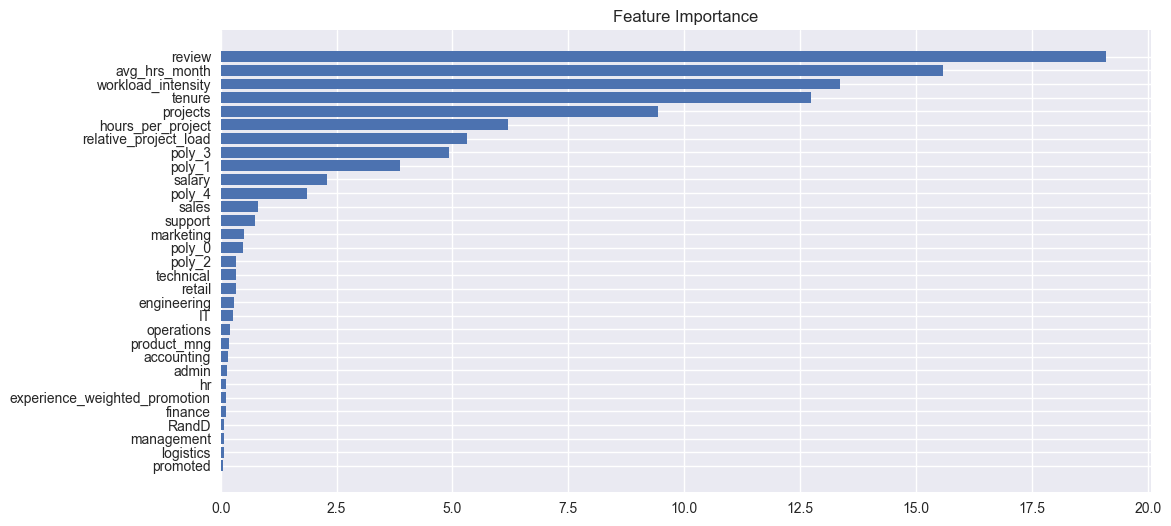

In [52]:
# Plotting feature importance

feature_importance_cat = cat_model.feature_importances_
sorted_idx = np.argsort(feature_importance_cat)

fig = plt.figure(figsize=(12, 6))
plt.barh(np.array(df_encoded_features)[sorted_idx], feature_importance_cat[sorted_idx])
plt.title('Feature Importance')

# **GBM - LGBM**

In [53]:
# Find best hyperparameters for Catboost using Optuna library

def objective(trial, data = df_encoded[df_encoded_features], target = df_encoded[target]):

    # Instantiate scaler
    scalers = trial.suggest_categorical("scalers", ['minmax', 'standard', 'robust', 'maxabs', None])

    if scalers == "minmax":
        scaler = MinMaxScaler()
    elif scalers == "standard":
        scaler = StandardScaler()
    elif scalers == 'maxabs':
        scaler = MaxAbsScaler()
    elif scalers == 'robust':
        scaler = RobustScaler()
    else:
        scaler = None

    # Transform data
    if scaler != None:
        data = scaler.fit_transform(data, target)
    
    # split data in training and test data
    train_x, test_x, train_y, test_y = train_test_split(data, target,
                                                        test_size=0.25,
                                                        random_state=777)
    # Suggest hyperparameters
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 2000),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-3, 20.0),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-3, 10.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1),
        'subsample': trial.suggest_float('subsample', 0, 1),
        'learning_rate': trial.suggest_float('learning_rate', 0, 0.5),
        'max_depth': trial.suggest_int('max_depth', 4, 20),
        'num_leaves' : trial.suggest_int('num_leaves', 1, 1500),
        'min_child_samples': trial.suggest_int('min_child_samples', 1, 200),
        'cat_smooth' : trial.suggest_int('min_data_per_groups', 1, 300)
    }
    
    # Create and fit model
    model = LGBMRegressor(
        metric = "rmse",
        random_state = 777,
        verbosity = -1 ,
        early_stopping_rounds = 200,
        **param
    )

    model.fit(train_x, train_y, eval_set = [(test_x, test_y)])
    
    # Predict and estimate results
    preds = model.predict(test_x)
    rmse = root_mean_squared_error(test_y, preds)

    return rmse



# Opruna study creation for tuning
sampler_lgbm = TPESampler(multivariate = True, group = True, seed = 777)
study_lgbm = optuna.create_study(study_name = "LGBM", sampler = sampler_lgbm)
study_lgbm.optimize(objective, n_trials = 200)
trial_lgbm = study_lgbm.best_trial
params_lgbm = study_lgbm.best_trial.params

# Printing the parameters
print("Number of finished trials: ", len(study_lgbm.trials))
print("Best trial:", trial_lgbm.number)
print("  Value: ", trial_lgbm.value)
print("  Params: ")

for key, value in trial_lgbm.params.items():
    print("    {}: {}".format(key, value))

[I 2024-06-22 06:32:37,094] A new study created in memory with name: LGBM
[I 2024-06-22 06:32:37,530] Trial 0 finished with value: 0.16964223235225517 and parameters: {'scalers': None, 'n_estimators': 1862, 'reg_alpha': 1.3390642887323898, 'reg_lambda': 1.1857274872193933, 'colsample_bytree': 0.6346025332360966, 'subsample': 0.6440292920709894, 'learning_rate': 0.046686628414614184, 'max_depth': 5, 'num_leaves': 885, 'min_child_samples': 69, 'min_data_per_groups': 297}. Best is trial 0 with value: 0.16964223235225517.
[I 2024-06-22 06:32:37,976] Trial 1 finished with value: 0.173393413877251 and parameters: {'scalers': 'standard', 'n_estimators': 523, 'reg_alpha': 0.006337167942572638, 'reg_lambda': 0.036525180752987024, 'colsample_bytree': 0.5965812028184121, 'subsample': 0.6109109313551226, 'learning_rate': 0.4414042236334395, 'max_depth': 14, 'num_leaves': 380, 'min_child_samples': 36, 'min_data_per_groups': 245}. Best is trial 0 with value: 0.16964223235225517.
[I 2024-06-22 06:32:

Number of finished trials:  200
Best trial: 75
  Value:  0.16831358745632444
  Params: 
    scalers: standard
    n_estimators: 1606
    reg_alpha: 3.5613727976448093
    reg_lambda: 0.5591817173381044
    colsample_bytree: 0.8238824882230199
    subsample: 0.117653578957952
    learning_rate: 0.06103240461470825
    max_depth: 8
    num_leaves: 1268
    min_child_samples: 44
    min_data_per_groups: 198


In [54]:
# History of optimization

optuna.visualization.plot_optimization_history(study_lgbm)

In [55]:
# Hyperparameters to score dependency

optuna.visualization.plot_slice(study_lgbm)

In [56]:
# Hyperparameter importances

optuna.visualization.plot_param_importances(study_lgbm)

In [57]:
# Implementing scaler
if params_lgbm['scalers'] == "minmax":
    scaler_lgbm = MinMaxScaler()
elif params_lgbm['scalers'] == "standard":
    scaler_lgbm = StandardScaler()
elif params_lgbm['scalers'] == 'maxabs':
    scaler_lgbm = MaxAbsScaler()
elif params_lgbm['scalers'] == 'robust':
    scaler_lgbm = RobustScaler()
else:
    scaler_lgbm = None

del params_lgbm['scalers']

lgbm = LGBMRegressor( 
        metric = "rmse",
        random_state = 777,
        verbosity = -1 ,
        **params_lgbm)

# Create pipeline
pipeline_lgbm = make_pipeline(scaler_lgbm, lgbm)

In [58]:
# Perform cross validation

scores_lgbm = cross_val_score(pipeline_lgbm, df_encoded[df_encoded_features], df_encoded[target],  scoring = 'neg_root_mean_squared_error') * (-1)
score_mean_lgbm = scores_lgbm.mean()
print(scores_lgbm, "Средняя оценка:", score_mean_lgbm)

[0.16752707 0.1646043  0.16917236 0.16867063 0.17179219] Средняя оценка: 0.1683533108502952


In [59]:
pipeline_lgbm.fit(df_encoded[df_encoded_features], df_encoded[target])

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('lgbmregressor',
                 LGBMRegressor(colsample_bytree=0.8238824882230199,
                               learning_rate=0.06103240461470825, max_depth=8,
                               metric='rmse', min_child_samples=44,
                               min_data_per_groups=198, n_estimators=1606,
                               num_leaves=1268, random_state=777,
                               reg_alpha=3.5613727976448093,
                               reg_lambda=0.5591817173381044,
                               subsample=0.117653578957952, verbosity=-1))])

Text(0.5, 1.0, 'Feature Importance')

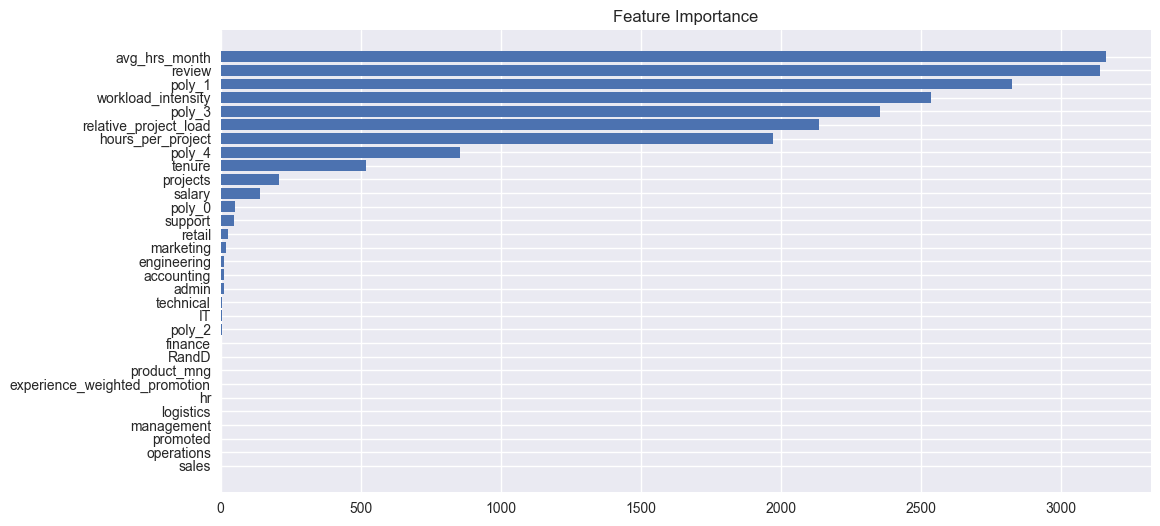

In [60]:
feature_importance_lgbm = pipeline_lgbm.steps[1][1].feature_importances_
sorted_idx = np.argsort(feature_importance_lgbm)

fig = plt.figure(figsize=(12, 6))
plt.barh(np.array(df_encoded_features)[sorted_idx], feature_importance_lgbm[sorted_idx])
plt.title('Feature Importance')

# **GBM - XGBoost**

In [61]:
# Find best hyperparameters for Catboost using Optuna library

def objective(trial, data = df_encoded[df_encoded_features], target = df_encoded[target]):

    # Instantiate scaler
    scalers = trial.suggest_categorical("scalers", ['minmax', 'standard', 'robust', 'maxabs', None])

    if scalers == "minmax":
        scaler = MinMaxScaler()
    elif scalers == "standard":
        scaler = StandardScaler()
    elif scalers == 'maxabs':
        scaler = MaxAbsScaler()
    elif scalers == 'robust':
        scaler = RobustScaler()
    else:
        scaler = None

    # Transform data
    if scaler != None:
        data = scaler.fit_transform(data, target)
    
    # split data in training and test data
    train_x, test_x, train_y, test_y = train_test_split(data, target,
                                                        test_size=0.25,
                                                        random_state=777)
    # Suggest hyperparameters
    param = {
        'learning_rate': trial.suggest_float('learning_rate', 0, 1),
        'max_depth': trial.suggest_int('max_depth', 4, 20),
        'min_child_weight': trial.suggest_int('min_child_weight', 0, 300),
        'subsample': trial.suggest_loguniform('subsample', 0.01, 1.0),
        'colsample_bytree': trial.suggest_loguniform('colsample_bytree', 0.01, 1),
        'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
        'n_estimators': trial.suggest_int('n_estimators', 100, 2000),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-3, 20.0),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-3, 10.0),
        'grow_policy': trial.suggest_categorical('grow_policy',
            ["depthwise", 'lossguide'])
    }
    
    # Create and fit model
    model = XGBRegressor(
        eval_metric = "rmse",
        random_state = 777,
        verbosity = 0 ,
        early_stopping_rounds = 200,
        **param
    )

    model.fit(train_x, train_y, eval_set = [(test_x, test_y)], verbose = False)
    
    # Predict and estimate results
    preds = model.predict(test_x)
    rmse = root_mean_squared_error(test_y, preds)

    return rmse



# Opruna study creation for tuning
sampler_xgbr = TPESampler(multivariate = True, group = True, seed = 777)
study_xgbr = optuna.create_study(study_name = "XGBoost", sampler = sampler_xgbr)
study_xgbr.optimize(objective, n_trials = 200)
trial_xgbr = study_xgbr.best_trial
params_xgbr = study_xgbr.best_trial.params

# Printing the parameters
print("Number of finished trials: ", len(study_xgbr.trials))
print("Best trial:", trial_xgbr.number)
print("  Value: ", trial_xgbr.value)
print("  Params: ")

for key, value in trial_xgbr.params.items():
    print("    {}: {}".format(key, value))

[I 2024-06-22 06:34:42,794] A new study created in memory with name: XGBoost
[I 2024-06-22 06:34:43,153] Trial 0 finished with value: 0.19688738263415168 and parameters: {'scalers': None, 'learning_rate': 0.9269970477498947, 'max_depth': 16, 'min_child_weight': 231, 'subsample': 0.034546983530247787, 'colsample_bytree': 0.19411477109985115, 'gamma': 5.584522623277171e-08, 'n_estimators': 251, 'reg_alpha': 0.34351558030828316, 'reg_lambda': 0.023624474282072754, 'grow_policy': 'depthwise'}. Best is trial 0 with value: 0.19688738263415168.
[I 2024-06-22 06:34:43,729] Trial 1 finished with value: 0.17268615180469316 and parameters: {'scalers': 'minmax', 'learning_rate': 0.186442600356727, 'max_depth': 10, 'min_child_weight': 58, 'subsample': 0.16665634875452312, 'colsample_bytree': 0.5829306550707957, 'gamma': 0.0009521614506087338, 'n_estimators': 581, 'reg_alpha': 0.005941356967584292, 'reg_lambda': 1.8433927643477426, 'grow_policy': 'lossguide'}. Best is trial 1 with value: 0.172686151

Number of finished trials:  200
Best trial: 91
  Value:  0.1692602701873139
  Params: 
    scalers: standard
    learning_rate: 0.16918164360157628
    max_depth: 6
    min_child_weight: 54
    subsample: 0.8763051202188071
    colsample_bytree: 0.7271666592514419
    gamma: 0.0003808308654190978
    n_estimators: 1436
    reg_alpha: 0.0024123927710186493
    reg_lambda: 2.8374206151734245
    grow_policy: lossguide


In [62]:
# History of optimization

optuna.visualization.plot_optimization_history(study_xgbr)

In [63]:
# Hyperparameters to score dependency

optuna.visualization.plot_slice(study_xgbr)

In [64]:
# Hyperparameter importances

optuna.visualization.plot_param_importances(study_xgbr)

In [65]:
# Implementing scaler
if params_xgbr['scalers'] == "minmax":
    scaler_xgbr = MinMaxScaler()
elif params_xgbr['scalers'] == "standard":
    scaler_xgbr = StandardScaler()
elif params_xgbr['scalers'] == 'maxabs':
    scaler_xgbr = MaxAbsScaler()
elif params_xgbr['scalers'] == 'robust':
    scaler_xgbr = RobustScaler()
else:
    scaler_xgbr = None

del params_xgbr['scalers']

xgbr = XGBRegressor( 
        eval_metric = "rmse",
        random_state = 777,
        verbosity = 0 ,
        **params_xgbr)

# Create pipeline
pipeline_xgbr = make_pipeline(scaler_xgbr, xgbr)

In [66]:
# Perform cross validation

scores_xgbr = cross_val_score(pipeline_xgbr, df_encoded[df_encoded_features], df_encoded[target],  scoring = 'neg_root_mean_squared_error') * (-1)
score_mean_xgbr = scores_xgbr.mean()
print(scores_xgbr, "Средняя оценка:", score_mean_xgbr)

[0.18594629 0.18147817 0.1855175  0.18341843 0.18881535] Средняя оценка: 0.1850351487691678


Text(0.5, 1.0, 'Feature Importance')

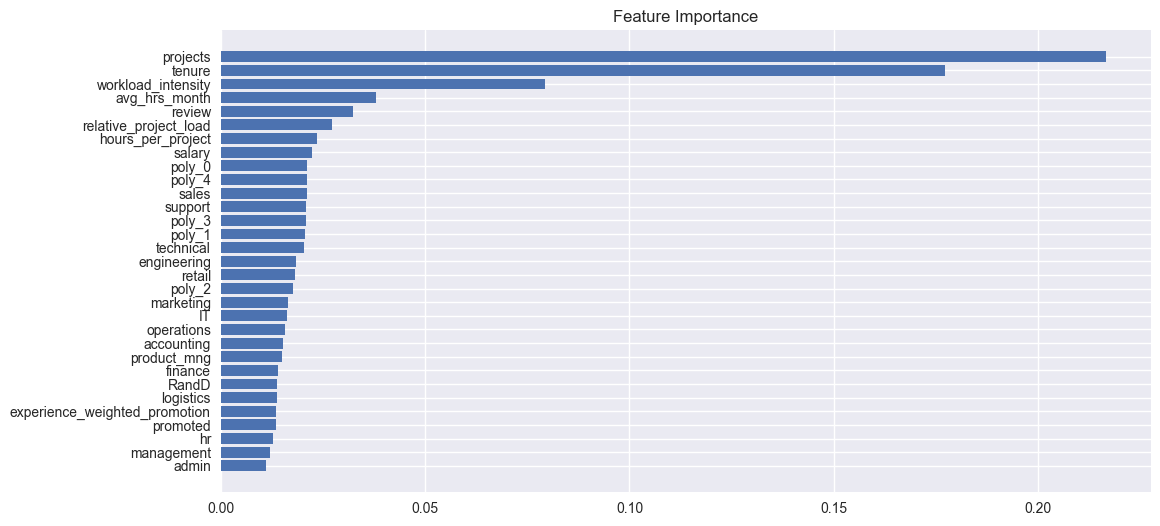

In [67]:
pipeline_xgbr.fit(df_encoded[df_encoded_features], df_encoded[target])

feature_importance_xgbr = pipeline_xgbr.steps[1][1].feature_importances_
sorted_idx = np.argsort(feature_importance_xgbr)

fig = plt.figure(figsize=(12, 6))
plt.barh(np.array(df_encoded_features)[sorted_idx], feature_importance_xgbr[sorted_idx])
plt.title('Feature Importance')